<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    
</div>


# Machine Learning: Laboratorio 04

<br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>
    
**Nombre Estudiante(s)**:  
- Cesar Godoy
- Cristhian Solís
- Pablo Madariaga


## Introducción

En este Informe se aplicarán diferentes algoritmos de **aprendizaje supervisado** y **aprendizaje no supervisado** en un conjunto de datos  **Apple Quality**, extraido desde **Kaggle** orientado en la calidad de la fruta.


En este análisis, se evaluarán los siguientes métodos supervisados:

- **Naive Bayes**: Un clasificador probabilístico que asume la independencia entre características.
- **Análisis Discriminante Lineal**: Un método de clasificación que maximiza la separación entre las clases mediante una combinación lineal de características.
- **Regresión Logística**: Un modelo lineal utilizado para predecir la probabilidad de una categoría, en este caso, la calidad de los productos.

### Objetivo de la Tarea

Construir modelos predictivos para determinar la **calidad** de los productos, basándose en las características físicas disponibles, como tamaño, peso, dulzura, entre otros factores.

### Metodología

El análisis que se llevará a cabo incluirá las siguientes etapas:

1. **Exploración de Datos:** Exploración de las características del dataset, identificación de valores faltantes y distribución de las variables.Incluyendo ingeniera de caracteristicas; manipulación y transformaciones de los datos, imputación de valores nulos, codificación de variables categóricas.
2. **Análisis Exploratorio de Datos:** Se revisan distribucción de variable objetivo dentro de DF y estadisticas descriptivas 
3. **Aplicación de Algoritmos No Supervisados:**
   - **Naive Bayes**
   - **Análisis Discriminante Lineal**
   - **Regresión Logística**
4. **Aplicación de Algoritmos Supervisados:**
5. **Comparación de modelos:** Se utilizarán métricas como **precisión**, **recall**, **matriz de confusión** y **ROC-AUC** para evaluar el rendimiento de los modelos.
6. **Aplicación de Herramienta DataRobot**
7. **Conclusiones:** Se resumirán los resultados clave del análisis

### ***Librerias***

In [1]:
import kaggle
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from xgboost import XGBClassifier
from sklearn.metrics import (classification_report,
                              confusion_matrix,
                              roc_auc_score,
                              roc_curve,
                              accuracy_score,
                              precision_score,
                              recall_score,
                              f1_score)



# 1. **Exploración de Datos (EDA)**


### Descripción del Conjunto de Datos

El conjunto de datos utilizado incluye información sobre **4,000 productos** (en este caso, manzanas) y sus características relevantes para el análisis, tales como:

- Tamaño
- Peso
- Dulzura
- Crocancia
- Jugosidad
- Madurez
- Acidez

El objetivo es predecir la variable **"Quality"** (calidad del producto).

Además, se investigará si alguna de estas características es un factor determinante para la **calidad** del producto.

### Descripción de las Columnas del Dataset Apple Quality
El dataset Apple Quality contiene 4,000 entradas (manzanas) y 9 columnas que describen atributos de la fruta que en su conjunto determinan la calidad de la fruta:

| #  | Columna      | Conteo de Valores No Nulos | Tipo    | Descripción                                          |
|----|--------------|----------------------------|---------|------------------------------------------------------|
| 0  | A_id         | 4000 valores no nulos      | object  | Identificador único para cada fruta                  |
| 1  | Size         | 4000 valores no nulos      | float64 | Tamaño de la fruta                                   |
| 2  | Weight       | 4000 valores no nulos      | float64 | Peso de la fruta                                     |
| 3  | Sweetness    | 4000 valores no nulos      | float64 | Grado de dulzura de la fruta                         |
| 4  | Crunchiness  | 4000 valores no nulos      | float64 | Textura que indica la crocancia de la fruta          |
| 5  | Juiciness    | 4000 valores no nulos      | float64 | Nivel de jugosidad de la fruta                       |
| 6  | Ripeness     | 4000 valores no nulos      | float64 | Etapa de madurez de la fruta                         |
| 7  | Acidity      | 4000 valores no nulos      | float64 | Nivel de acidez de la fruta                          |
| 8  | Quality      | 4000 valores no nulos      | object  | Calidad general de la fruta                          |

### 1.1 Carga de los datos

Cargamos el dataset y verificamos la estructura de los datos.

In [2]:
# Descargar el dataset utilizando la API de Kaggle
custom_path = r'C:\Users\csolis\OneDrive - Nutreco Nederland B.V\Documents\DOCUMENTOS PERSONALES\Estudio\03_Machine_Learning\Laboratorios\Data'
kaggle.api.dataset_download_files('nelgiriyewithana/apple-quality', path=custom_path, unzip=True)
files = os.listdir(custom_path)
print("Archivos descargados de Kaggle:", files)


Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality
Archivos descargados de Kaggle: ['apple_quality.csv', 'Churn_Modelling.csv']


In [3]:
# Declarar DF
file_path = r'C:\Users\csolis\OneDrive - Nutreco Nederland B.V\Documents\DOCUMENTOS PERSONALES\Estudio\03_Machine_Learning\Laboratorios\Data\apple_quality.csv'
df = pd.read_csv(file_path)
print(df.head())


   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  


### 1.2 Información del Dataset

Revisamos los tipos de datos y la cantidad de valores nulos para determinar si necesitamos imputar o eliminar valores faltantes.

In [4]:
# Tamaño del DF
print(f"El tamaño del dataset es {df.shape}")

El tamaño del dataset es (4001, 9)


In [5]:
# Tipos de datos y composición de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [6]:
# Filas con valores faltantes
missing_values = df[df.isnull().any(axis=1)]
print(missing_values)


      A_id  Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
4000   NaN   NaN     NaN        NaN          NaN        NaN       NaN   

                                Acidity Quality  
4000  Created_by_Nidula_Elgiriyewithana     NaN  


Dado que unico valor nulo al cargar el DF no corresponde a un registro del DF se procede a botar

In [7]:
# Manejo valor NaN
df = df.dropna()

In [8]:
# Cambio tipo de datos
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')
df['A_id'] = df['A_id'].astype('object')

In [9]:
# Verificación DF
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   object 
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [10]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu') 

,count,mean,std,min,25%,50%,75%,max
Size,4000.000000,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.000000,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.000000,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.000000,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.000000,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.000000,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidity,4000.000000,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736


### 1.3 Codificación de variable objetivo

In [11]:
# Target
print("Valores únicos en 'Quality':", df['Quality'].unique())

Valores únicos en 'Quality': ['good' 'bad']


In [12]:
# Crear el codificador y transformar la columna 'quality'
le = LabelEncoder()
df['Quality'] = le.fit_transform(df['Quality'])

# Ver los mapeos: 0 = 'bad', 1 = 'good'
print(dict(enumerate(le.classes_)))

{0: 'bad', 1: 'good'}


<Axes: xlabel='Quality'>

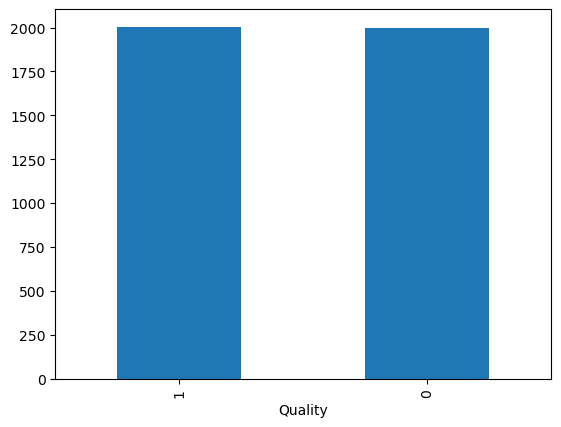

In [13]:
df['Quality'].value_counts().plot(kind = 'bar')

In [14]:
# DF para Algoritmo No Supervisado
df_no_supervisado = df.drop('A_id', axis=1)
df_no_supervisado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 265.6 KB


In [15]:
# DF para Algoritmo Supervisado
df_supervisado = df.drop(columns=['A_id'])
df_no_supervisado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 265.6 KB


### Resumen:
- **Variables numéricas:**  
`Size`, `Weight`, `Sweetness`, `Crunchiness`, `Juiciness`, `Ripeness`, `Acidity` permiten analizar diferentes aspectos físicos de las manzanas.

- **Variables categóricas:**  
 `A_id` (identificador único) y `Quality` (calidad general), esta última es clave como variable objetivo para modelos de clasificación.

- **Variable objetivo :**   
`Quality`corresponde a la calidad de la fruta, en función de lo anterior, el desarrollo de los algoritmos de ML estan orientados en identificar el algoritmo de clasificación que mejor nos prediga si la fruta sera de calidad (minimizar la tasa de falsos positivos) e identificar dentro de los datos grupos que nos permitan segmentar la fruta segun sus caracteristicas.

- **Ingenieria de Caracteristicas:**  
En función de los resultados de la media, valores minimos y maximos, se puede identificar que las variables se encuentran en escalas validas, con medias centradas en 0. 
Se genero label para la variable objetivo y se generan dos copias del DF para trabajar con los distintos tipos de Algoritmo y sus posibles requerimientos a posterior.

- **Distribución del Target:**  
Se observa incialmente que se trabaja con un set de datos balanceados con una distribución uniforme entre ambos valores 'good'(1) & 'bad'(0)

# 2. **Analisis Descriptivo**
Calculamos estadísticas básicas para las variables numéricas, para obtener una visión general de su distribución.

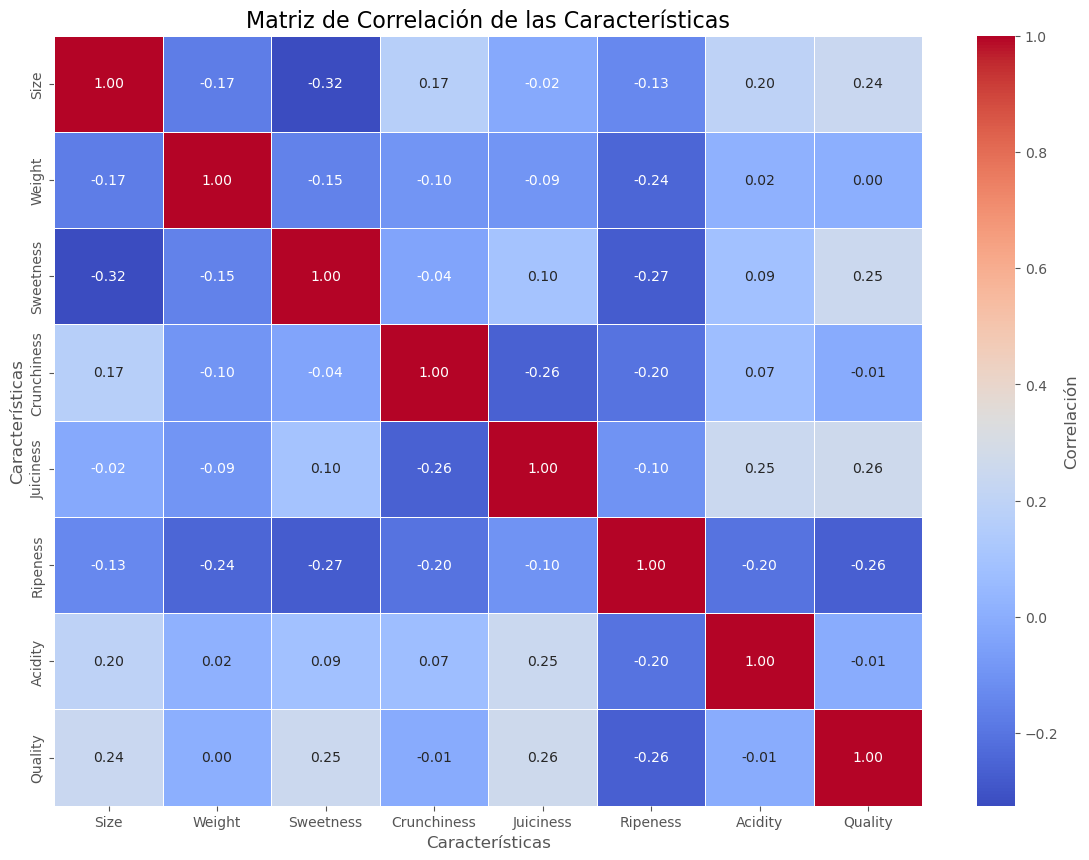

In [16]:
# Matriz de correlación
plt.style.use('ggplot')
corr_matrix = df_supervisado.corr()
plt.figure(figsize=(14,10))
heatmap = sns.heatmap(
    corr_matrix, 
    cmap='coolwarm', 
    annot=True, 
    fmt=".2f", 
    linewidths=0.5, 
    cbar_kws={'label': 'Correlación'}
)

plt.title('Matriz de Correlación de las Características', fontsize=16)
plt.xlabel('Características', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.show()

# 3. **Aplicación de Algoritmos No Supervisados:**

### **Kmeans & PCA**


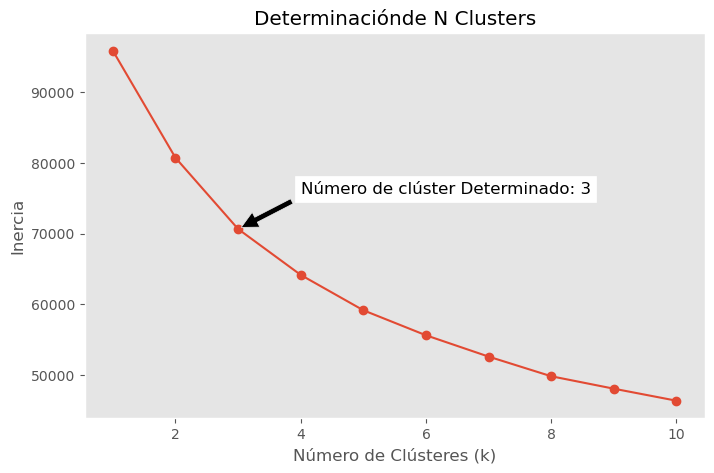

Inercia: 70651.0633244957
Silhouette Score: 0.14984728363259814
Calinski-Harabasz Score: 713.3117004255517
Davies-Bouldin Score: 1.8767766227729483


In [17]:
# Determinar número de clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df_no_supervisado)
    inertia.append(kmeans.inertia_)

# Suponemos que el número óptimo de clústeres es 7, según el gráfico
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=123)

# Predecir los clústeres (ajustar y predecir al mismo tiempo)
y_kmeans = kmeans.fit_predict(df_no_supervisado)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid()

# Anotación grafica
plt.annotate(f'Número de clúster Determinado: {optimal_k}', 
             xy=(optimal_k, inertia[optimal_k-1]), 
             xytext=(optimal_k+1, inertia[optimal_k-1] + 5000),  # Ajuste de posición
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='black', backgroundcolor='white')

plt.title('Determinaciónde N Clusters')
plt.show()

# Calcular métricas
silhouette_avg = silhouette_score(df_no_supervisado, y_kmeans)
calinski_harabasz = calinski_harabasz_score(df_no_supervisado, y_kmeans)
davies_bouldin = davies_bouldin_score(df_no_supervisado, y_kmeans)

# Mostrar métricas
print(f"Inercia: {kmeans.inertia_}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")
print(f"Davies-Bouldin Score: {davies_bouldin}")

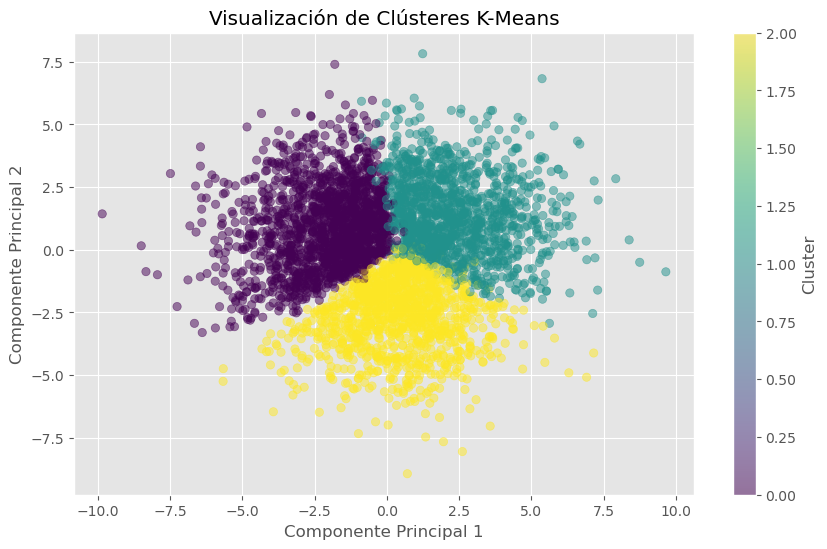

In [18]:
# Agregar etiquetas de clúster al DataFrame original
df_no_supervisado['Cluster'] = kmeans.labels_

# Reducir la dimensionalidad a 2 componentes para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_no_supervisado)

# Graficar los clústeres
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_no_supervisado['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Visualización de Clústeres K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()


### Conclusiones Metricas Algoritmo no Supervisado

- **Inercia**: 70651.06
- **Silhouette Score**: 0.1498
- **Calinski-Harabasz Score**: 713.31
- **Davies-Bouldin Score**: 1.8768

La inercia, que mide las distancias cuadradas de los puntos a su respectivo centroide, indica una buena compactación. Sin embargo, es importante tener en cuenta que esta métrica tiende a aumentar en función del número de clústeres. Se determinó que el número óptimo de clústeres es 3, según la visualización.

El **Silhouette Score**, que varía entre -1 y 1, presenta un valor cercano a 0, lo que sugiere que los puntos están en el borde entre clústeres, indicando una cohesión interna baja.

En resumen, el resultado con 3 clústeres muestra una buena compactación a través de la inercia, pero la cohesión interna es baja según el Silhouette Score. El **Calinski-Harabasz Score** refleja una calidad de agrupamiento regular, mientras que el **Davies-Bouldin Score** sugiere una separación adecuada entre los clústeres.

Esto se puede identificar visualmente en un gráfico con 2 componentes principales mostrando el resultado de los clústeres.

In [19]:
# Análisis descriptivo de cada clúster
cluster_analysis = df_no_supervisado.groupby('Cluster').mean()
print(cluster_analysis)


             Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
Cluster                                                                    
0       -0.081609 -0.939091  -1.787057     1.192244  -0.654319  1.337828   
1        0.504515 -1.020218  -0.412913     0.929133   1.628800 -0.771937   
2       -2.119051 -1.026467   1.261528     0.762420   0.943835  0.670258   

          Acidity   Quality  
Cluster                      
0       -0.790184  0.322520  
1        2.078726  0.625103  
2       -0.814765  0.615450  


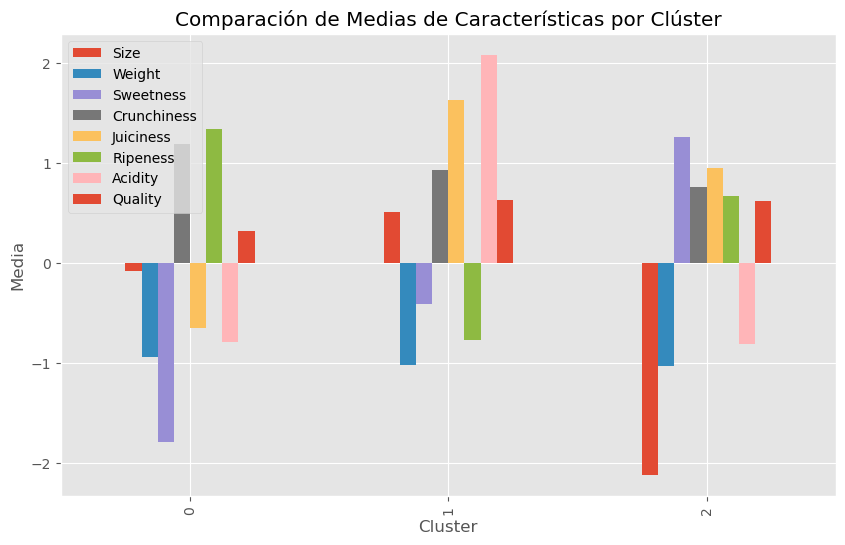

In [20]:
# Comparar medias de características entre clústeres
means = df_no_supervisado.groupby('Cluster').mean().reset_index()
means.plot(x='Cluster', kind='bar', figsize=(10, 6))
plt.title('Comparación de Medias de Características por Clúster')
plt.ylabel('Media')
plt.show()

### Descripción de los Clústeres

**Cluster 0**  
Este clúster se caracteriza por tener productos pequeños y ligeros, con baja dulzura y alta crujiente, pero con una jugosidad baja. Los productos están completamente maduros y presentan una acidez moderada, resultando en una buena calidad a pesar de su dulzura.

**Cluster 1**  
Los productos de este clúster son grandes y ligeros, con un equilibrio en la dulzura y una alta crujiente. Son muy jugosos, pero no están completamente maduros y tienen una acidez alta, lo que les confiere un sabor refrescante y una buena calidad general.

**Cluster 2**  
Este clúster incluye productos muy pequeños y ligeros, que son muy dulces y jugosos, aunque con una textura crujiente moderada. La madurez es alta y presentan una ligera acidez, resultando en una buena percepción de calidad.

# 4. **Aplicación de Algoritmos Supervisados:**

In [21]:
# Preparación de set de entrenamiento y evaluaciónm
X = df_supervisado.drop('Quality', axis=1)
y = df_supervisado['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### **Regresion Logistica**

In [22]:
# Algoritmo regresión logistica
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predicciones
y_pred_LogR = logistic_model.predict(X_test)

# Evaluación métricas
accuracy_logistic = accuracy_score(y_test, y_pred_LogR)
auc_logistic= roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
precision_logistic = precision_score(y_test, y_pred_LogR, average='weighted')
recall_logistic = recall_score(y_test, y_pred_LogR, average='weighted')
f1_logistic = f1_score(y_test, y_pred_LogR, average='weighted')
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_LogR)
classification_report_logistic = classification_report(y_test, y_pred_LogR)

print(f"Accuracy: {accuracy_logistic * 100:.2f}%")
print(f"AUC: {auc_logistic* 100:.2f}%" )
print(f"Precisión (Precision): {precision_logistic * 100:.2f}%")
print(f"Sensibilidad (Recall): {recall_logistic * 100:.2f}%")
print(f"F1-Score: {f1_logistic * 100:.2f}%")
print("\nMatriz de Confusión:")
print(confusion_matrix_logistic)
print("\nInforme de Clasificación:")
print(classification_report_logistic)

Accuracy: 74.00%
AUC: 81.77%
Precisión (Precision): 74.00%
Sensibilidad (Recall): 74.00%
F1-Score: 73.99%

Matriz de Confusión:
[[430 161]
 [151 458]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       591
           1       0.74      0.75      0.75       609

    accuracy                           0.74      1200
   macro avg       0.74      0.74      0.74      1200
weighted avg       0.74      0.74      0.74      1200



### **Comentarios Regresión Logistica**

El modelo presenta un F1-Score 73.9%, lo que indica un equilibrio en la identificación de ambas clases. 
En función del objetivo, se observa un número de **falsos negativos** (151 casos), lo que sugiere que el modelo clasifica incorrectamente una parte de las instancias negativas como positivas. 

Dado el Recall, podría llevar a una serie de implicaciones negativas si queremos velar por clasificar correctamente la calidad "good" para efectos de negocio. Una posible acción es  **ajustar de umbral  de decisión** para mejorar la sensibilidad.

### **Arbol de decisión**

In [23]:
# Algoritmo árbol de decisión
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=123)
decision_tree.fit(X_train, y_train)

# Predicciones
y_pred_decisiontree = decision_tree.predict(X_test)

# Metricas
accuracy_decisiontree = accuracy_score(y_test,  y_pred_decisiontree)
auc_decisiontree = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])
precision_decisiontree = precision_score(y_test, y_pred_decisiontree, average='weighted')
recall_decisiontree = recall_score(y_test, y_pred_decisiontree, average='weighted')
f1_decisiontree = f1_score(y_test, y_pred_decisiontree, average='weighted')
confusion_matrix_decisiontree = confusion_matrix(y_test, y_pred_decisiontree)
classification_report_decisiontree = classification_report(y_test, y_pred_decisiontree)

print(f"Accuracy: {accuracy_decisiontree * 100:.2f}%")
print(f"AUC: {auc_decisiontree* 100:.2f}%" )
print(f"Precisión (Precision): {precision_decisiontree * 100:.2f}%")
print(f"Sensibilidad (Recall): {recall_decisiontree * 100:.2f}%")
print(f"F1-Score: {f1_decisiontree * 100:.2f}%")
print("\nMatriz de Confusión:")
print(confusion_matrix_decisiontree)
print("\nInforme de Clasificación:")
print(classification_report_decisiontree)


Accuracy: 69.67%
AUC: 73.20%
Precisión (Precision): 69.72%
Sensibilidad (Recall): 69.67%
F1-Score: 69.62%

Matriz de Confusión:
[[389 202]
 [162 447]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.71      0.66      0.68       591
           1       0.69      0.73      0.71       609

    accuracy                           0.70      1200
   macro avg       0.70      0.70      0.70      1200
weighted avg       0.70      0.70      0.70      1200



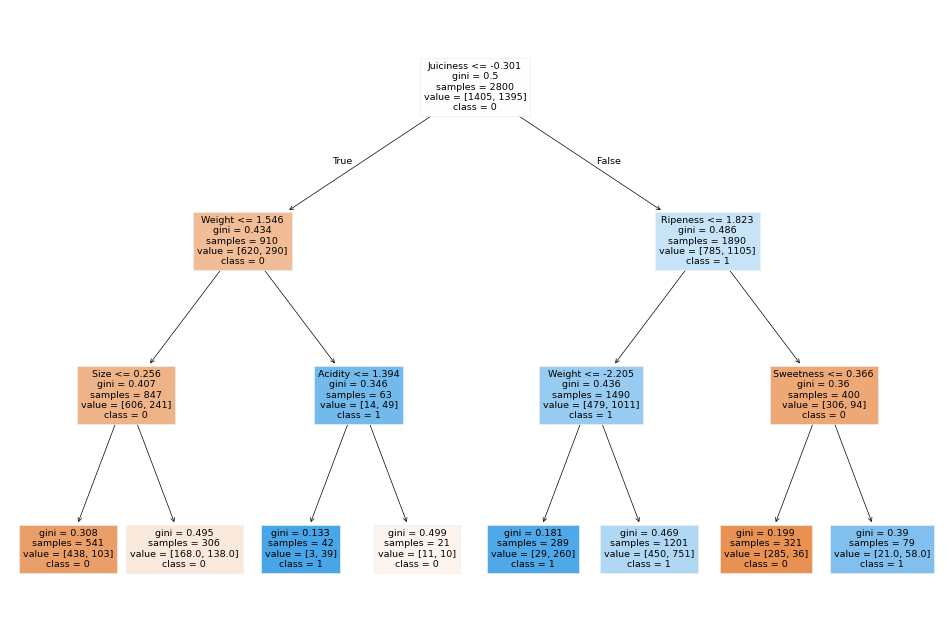

In [24]:
# Convertir las clases numéricas a cadenas
class_names = [str(cls) for cls in decision_tree.classes_]

# Visualización del árbol
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

### **Comentarios Arbol de decisión**

El modelo presenta un F1-Score de 69.62%, lo que indica un equilibrio moderado en la identificación de ambas clases, el Recall de 69.67% sugiere que el modelo clasifica incorrectamente   instancias positivas como negativas, reflejado en los 161 falsos negativos. 

Una opción para mejorar el rendimiento de este modelo es ampliar la cantidad de niveles del arbol en el comando max_depth=3

### **XGBoost**

In [25]:
# Algoritmo XGBoost

#Clasificador XGBoost
xgb_classifier = XGBClassifier(random_state=123, tree_method='hist',max_depth=3,n_estimators=100, learning_rate=0.1)

xgb_classifier.fit(X_train, y_train)

# Predicciones
xgb_y_pred = xgb_classifier.predict(X_test)

# Metricas
accuracy_xgb = accuracy_score(y_test, xgb_y_pred)
auc_xgb = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:, 1])
precision_xgb= precision_score(y_test, xgb_y_pred, average='weighted')
recall_xgb = recall_score(y_test, xgb_y_pred, average='weighted')
f1_xgb = f1_score(y_test, xgb_y_pred, average='weighted')
confusion_matrix_xgb= confusion_matrix(y_test, xgb_y_pred)
classification_report_xgb = classification_report(y_test, xgb_y_pred)

print(f"Accuracy: {accuracy_xgb * 100:.2f}%")
print(f"AUC: {auc_xgb* 100:.2f}%" )
print(f"Precisión (Precision): {precision_xgb * 100:.2f}%")
print(f"Sensibilidad (Recall): {recall_xgb * 100:.2f}%")
print(f"F1-Score: {f1_xgb * 100:.2f}%")
print("\nMatriz de Confusión:")
print(confusion_matrix_xgb)
print("\nInforme de Clasificación:")
print(classification_report_xgb)

Accuracy: 85.08%
AUC: 92.81%
Precisión (Precision): 85.09%
Sensibilidad (Recall): 85.08%
F1-Score: 85.08%

Matriz de Confusión:
[[503  88]
 [ 91 518]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       591
           1       0.85      0.85      0.85       609

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200



### **Comentarios XGBoost**

El modelo tiene un buen rendimiento con una exactitud del 85.08% y un AUC de 92.81%, indicando una alta capacidad para distinguir entre clases, el Recall de 85.08% sugiere una tasa baja de instancias positivas clasificadas como negativas, reflejado en los 91 falsos negativos. 

# 5. **Comparación de Modelos**

### **Comparación de Métricas Generales**

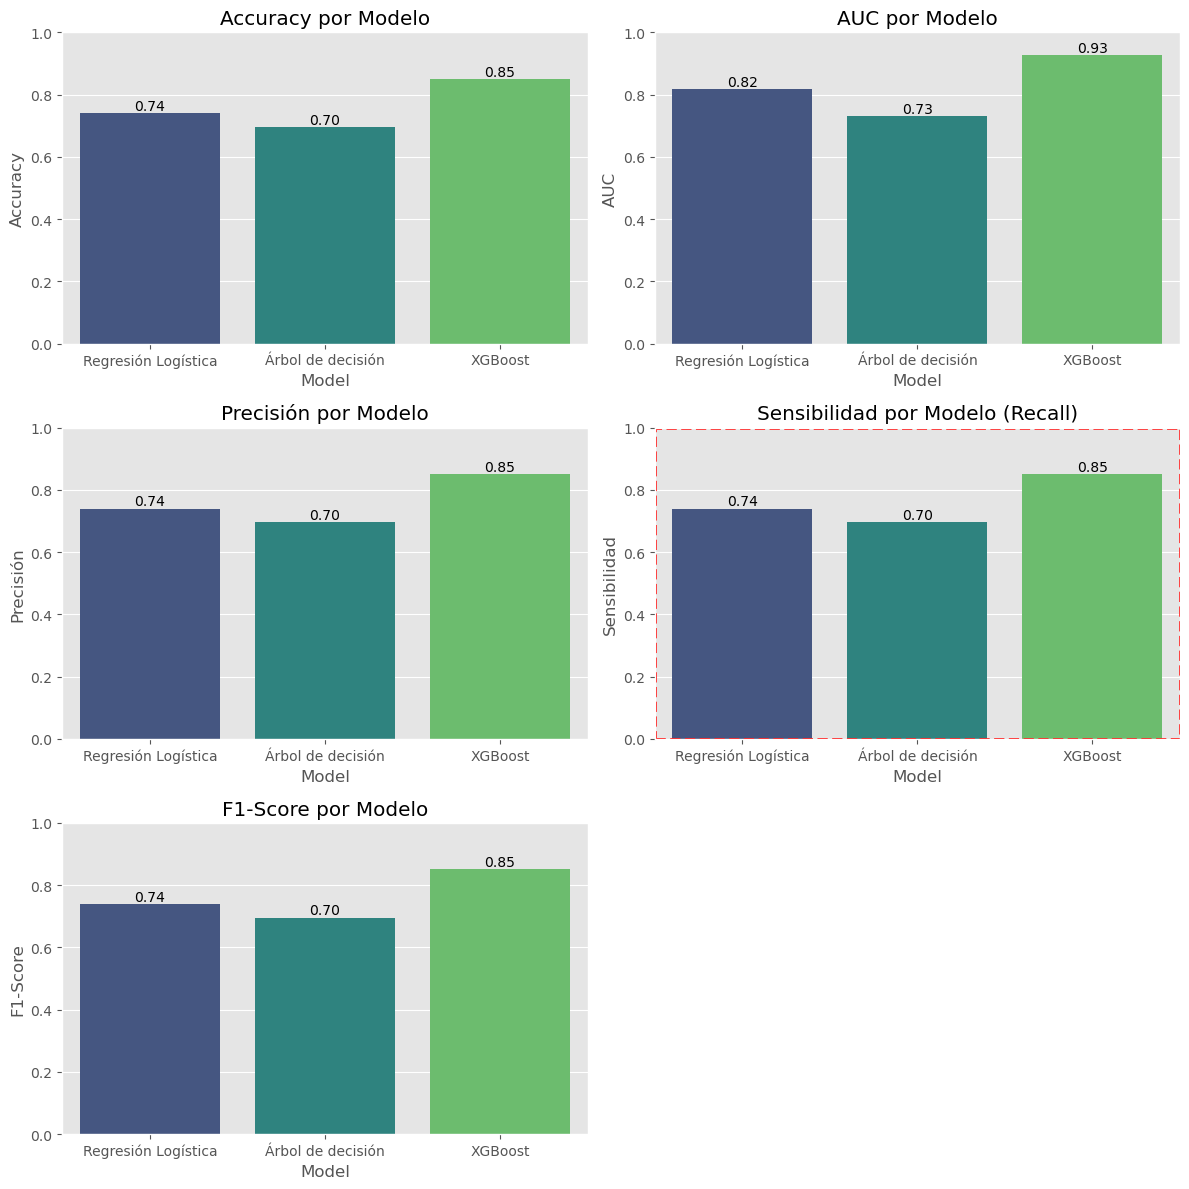

In [27]:
# Comparación de Métricas
metrics = {
    'Model': ['Regresión Logística', 'Árbol de decisión', 'XGBoost'],
    'Accuracy': [accuracy_logistic, accuracy_decisiontree, accuracy_xgb],
    'AUC': [auc_logistic, auc_decisiontree, auc_xgb],
    'Precisión': [precision_logistic, precision_decisiontree, precision_xgb],
    'Sensibilidad': [recall_logistic, recall_decisiontree, recall_xgb],
    'F1-Score': [f1_logistic, f1_decisiontree, f1_xgb]
}

# Convertir a DataFrame
metrics_df = pd.DataFrame(metrics)

# Visualización
fig, ax = plt.subplots(3, 2, figsize=(12, 12))  # Tamaño de la figura

# Gráfico de Accuracy
sns.barplot(x='Model', y='Accuracy', hue='Model', data=metrics_df, ax=ax[0, 0], palette='viridis', legend=False)
ax[0, 0].set_title('Accuracy por Modelo')
ax[0, 0].set_ylim(0, 1)  # Limitar el eje y entre 0 y 1
ax[0, 0].set_ylabel('Accuracy')
for i in range(len(metrics_df)):
    ax[0, 0].text(i, metrics_df['Accuracy'][i] + 0.01, f'{metrics_df["Accuracy"][i]:.2f}', ha='center')

# Gráfico de AUC
sns.barplot(x='Model', y='AUC', hue='Model', data=metrics_df, ax=ax[0, 1], palette='viridis', legend=False)
ax[0, 1].set_title('AUC por Modelo')
ax[0, 1].set_ylim(0, 1)
ax[0, 1].set_ylabel('AUC')
for i in range(len(metrics_df)):
    ax[0, 1].text(i, metrics_df['AUC'][i] + 0.01, f'{metrics_df["AUC"][i]:.2f}', ha='center')

# Gráfico de Precisión
sns.barplot(x='Model', y='Precisión', hue='Model', data=metrics_df, ax=ax[1, 0], palette='viridis', legend=False)
ax[1, 0].set_title('Precisión por Modelo')
ax[1, 0].set_ylim(0, 1)
ax[1, 0].set_ylabel('Precisión')
for i in range(len(metrics_df)):
    ax[1, 0].text(i, metrics_df['Precisión'][i] + 0.01, f'{metrics_df["Precisión"][i]:.2f}', ha='center')

# Gráfico de Sensibilidad (Recall)
sns.barplot(x='Model', y='Sensibilidad', hue='Model', data=metrics_df, ax=ax[1, 1], palette='viridis', legend=False)
ax[1, 1].set_title('Sensibilidad por Modelo (Recall)')
ax[1, 1].set_ylim(0, 1)
ax[1, 1].set_ylabel('Sensibilidad')
for i in range(len(metrics_df)):
    ax[1, 1].text(i, metrics_df['Sensibilidad'][i] + 0.01, f'{metrics_df["Sensibilidad"][i]:.2f}', ha='center')
rect = patches.Rectangle((-.5, 0), 3, 1, linewidth=2, edgecolor='red', facecolor='none', linestyle='--')
ax[1, 1].add_patch(rect)
# Gráfico de F1-Score en el último lugar disponible
sns.barplot(x='Model', y='F1-Score', hue='Model', data=metrics_df, ax=ax[2, 0], palette='viridis', legend=False)
ax[2, 0].set_title('F1-Score por Modelo')
ax[2, 0].set_ylim(0, 1)
ax[2, 0].set_ylabel('F1-Score')
for i in range(len(metrics_df)):
    ax[2, 0].text(i, metrics_df['F1-Score'][i] + 0.01, f'{metrics_df["F1-Score"][i]:.2f}', ha='center')

# Desactivar el último subgráfico (vacío)
ax[2, 1].axis('off')

# Ajustar diseño para evitar solapamientos
plt.tight_layout()
plt.show()



### **Comparaciones Metricas Generales**

En general, el algoritmo de XGBoost es el que tiene mejor desempeño en la totalidad de metricas, destacando en su capacidad para reducir la tasa de falsos negativos sobre los demas modelos y una diferencia radical en AUC en comparación a los demás algoritmos.

### **Comparación de Matriz de confusión**

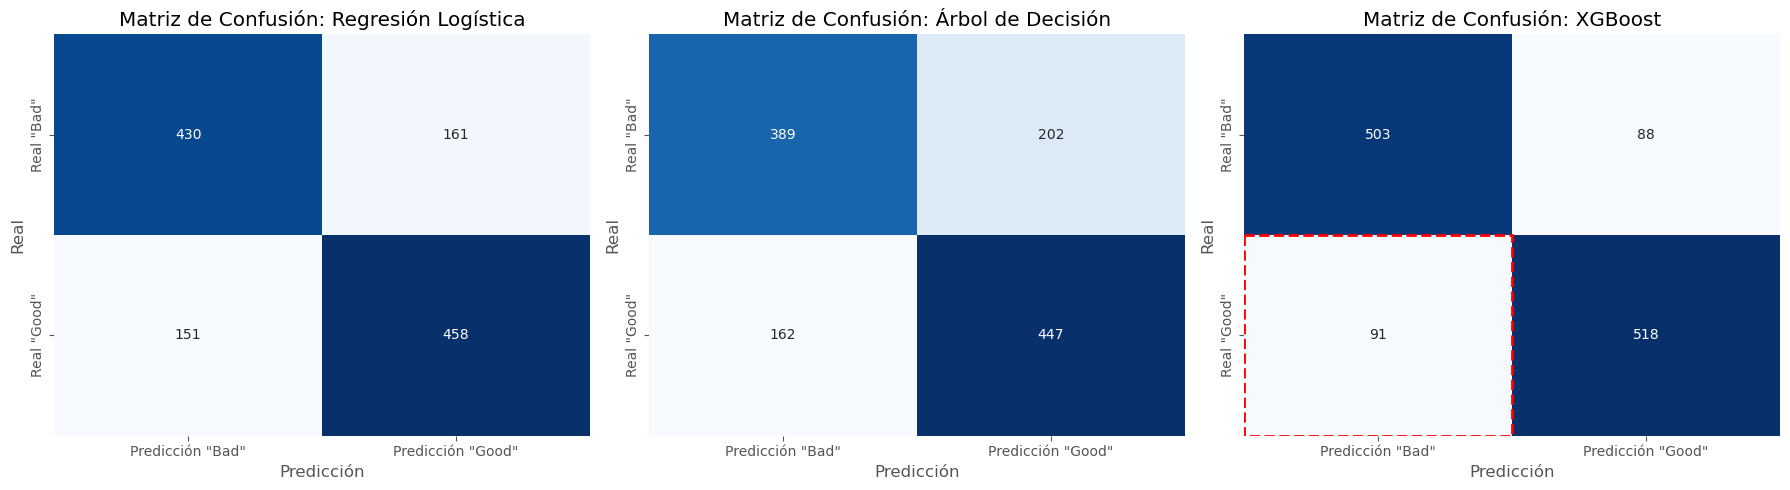

In [28]:
# Comparación Matriz de confusión
def plot_confusion_matrix(ax, cm, model_name, highlight=False):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicción "Bad"', 'Predicción "Good"'],
                yticklabels=['Real "Bad"', 'Real "Good"'], ax=ax)

    ax.set_title(f'Matriz de Confusión: {model_name}')
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Real')

    if highlight:
        rect = patches.Rectangle((0, 1), 1, 1, linewidth=2, edgecolor='red', facecolor='none', linestyle='--')
        ax.add_patch(rect)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plot_confusion_matrix(axes[0], confusion_matrix_logistic, 'Regresión Logística')
plot_confusion_matrix(axes[1], confusion_matrix_decisiontree, 'Árbol de Decisión')
plot_confusion_matrix(axes[2], confusion_matrix_xgb, 'XGBoost', highlight=True)

plt.tight_layout() 
plt.show()


### **Comparaciones Matriz de confusión**

Como se identifico previamente el algoritmo con la menor tasa de falsos negativos corresponde a XGBoost (91 FN), por lo cual, es el que mejor se adapta respecto a estos modelos para el objetivo de información en la minimización de la tasa de falsos negativos y efectividad para predecir la calidad "good".



# 6. **Aplicación de Herramienta DataRobot**

### **Nystroem Kernel SVM Classifier**

Modelo recomendado tras uso de herramienta

In [29]:
# Librerias especificas para desarrollo de recomendación DataRobot
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.kernel_approximation import Nystroem

In [34]:
# Nystroem Kernel SVM Classifier

# Crear un transformador Nystroem y un clasificador SVM
nystroem = Nystroem(kernel='rbf', n_components=100, random_state=42)  # Ajusta n_components según lo necesites
svm = SVC(kernel='linear', probability=True)  # Usar un kernel lineal y habilitar predict_proba

# Clasificador Nystroem Kernel SVM 
scaler = StandardScaler()
model = make_pipeline(scaler, nystroem, svm)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas
accuracy_svm = accuracy_score(y_test, y_pred)
auc_svm = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # Ahora se puede usar predict_proba
precision_svm = precision_score(y_test, y_pred, average='weighted')
recall_svm = recall_score(y_test, y_pred, average='weighted')
f1_svm = f1_score(y_test, y_pred, average='weighted')
confusion_matrix_svm = confusion_matrix(y_test, y_pred)
classification_report_svm = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_svm * 100:.2f}%")
print(f"AUC: {auc_svm * 100:.2f}%")
print(f"Precisión (Precision): {precision_svm * 100:.2f}%")
print(f"Sensibilidad (Recall): {recall_svm * 100:.2f}%")
print(f"F1-Score: {f1_svm * 100:.2f}%")
print("\nMatriz de Confusión:")
print(confusion_matrix_svm)
print("\nInforme de Clasificación:")
print(classification_report_svm)

Accuracy: 86.17%
AUC: 93.46%
Precisión (Precision): 86.19%
Sensibilidad (Recall): 86.17%
F1-Score: 86.17%

Matriz de Confusión:
[[515  76]
 [ 90 519]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       591
           1       0.87      0.85      0.86       609

    accuracy                           0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.86      0.86      0.86      1200



### **Reflexiones Uso de DataRobot**

- En general el algoritmo **Nystroem Kernel SVM Classifier** presenta mejores resultados en todas las métricas en comparación a los algoritmos desarrollados previamente, comparando con **XGBoost** cual obtuvo mejores resultados: 

| Métrica                       | Nystroem Kernel SVM Classifier         |  XGBoost         |
|-------------------------------|------------------|------------------|
| **Accuracy**                  | 86.17%           | 85.08%           |
| **AUC**                       | 93.46%           | 92.81%           |
| **Precisión (Precision)**     | 86.19%           | 85.09%           |
| **Sensibilidad (Recall)**     | 86.17%           | 85.08%           |
| **F1-Score**                 | 86.17%           | 85.08%           |

lo cual, muestra el valor agredado de una herramienta que evalua varios modelos dado que este algoritmo no se huibiese evaluado sin la recomendación de la plataforma


# 6. **Aplicación de Herramienta DataRobot**